Results for Model Trained with K-Fold CV:
Train R²: 0.4312, RMSE: 1.9333, MAE: 1.3916
Test R²: 0.4920, RMSE: 1.5432, MAE: 1.3445


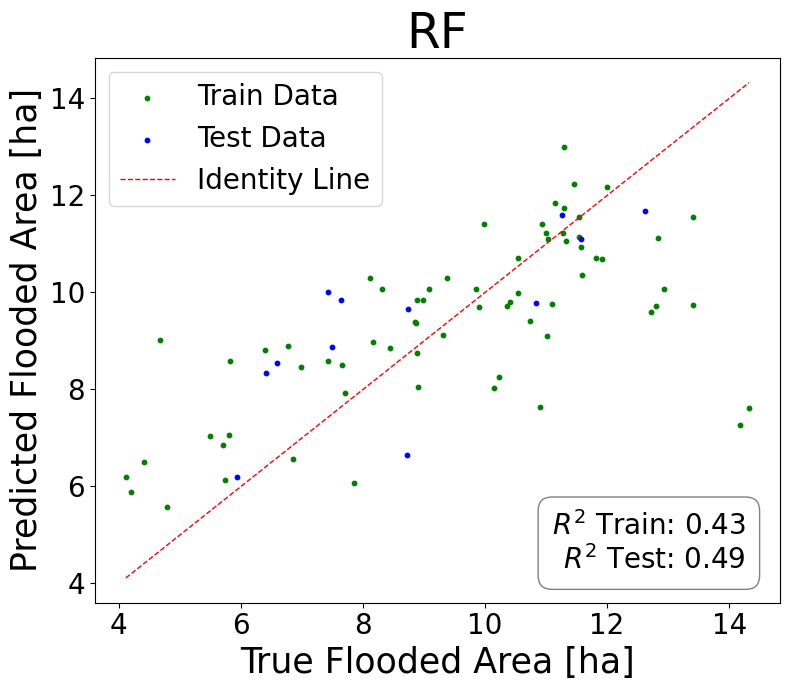

In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load data
data = pd.read_excel(r'D:\Complete_data_local_norm.xlsx')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=4)

# Initialize model
model = RandomForestRegressor(n_estimators=300, min_samples_leaf=1, min_samples_split=2, max_depth=30, random_state=16)

# Train and evaluate using K-Fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=0)
y_train_cv_pred = cross_val_predict(model, xtrain, ytrain, cv=kf)
model.fit(xtrain, ytrain)
y_test_cv_pred = model.predict(xtest)

# Evaluate CV-trained model
cv_train_r2 = r2_score(ytrain, y_train_cv_pred)
cv_train_mse = np.sqrt(mean_squared_error(ytrain, y_train_cv_pred))
cv_train_mae = mean_absolute_error(ytrain, y_train_cv_pred)

cv_test_r2 = r2_score(ytest, y_test_cv_pred)
cv_test_mse = np.sqrt(mean_squared_error(ytest, y_test_cv_pred))
cv_test_mae = mean_absolute_error(ytest, y_test_cv_pred)

print("Results for Model Trained with K-Fold CV:")
print(f"Train R²: {cv_train_r2:.4f}, RMSE: {cv_train_mse:.4f}, MAE: {cv_train_mae:.4f}")
print(f"Test R²: {cv_test_r2:.4f}, RMSE: {cv_test_mse:.4f}, MAE: {cv_test_mae:.4f}")

# Scatter plot for CV model results
plt.figure(figsize=(8, 7))
plt.scatter(ytrain, y_train_cv_pred, c='green', s=10, label='Train Data')
plt.scatter(ytest, y_test_cv_pred, c='blue', s=10, label='Test Data')

# Identity line
min_val, max_val = min(y.min(), y_test_cv_pred.min()), max(y.max(), y_test_cv_pred.max())
identity_line = np.linspace(min_val, max_val, 100)
plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=1.0, label='Identity Line')

# Title and labels with adjusted font size
plt.title('RF', fontsize=35)
plt.xlabel('True Flooded Area [ha]', fontsize=25)
plt.ylabel('Predicted Flooded Area [ha]', fontsize=25)

# Adjust tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add R² scores in lower right corner
cv_r2_text = f"$R^2$ Train: {cv_train_r2:.2f}\n$R^2$ Test: {cv_test_r2:.2f}"
plt.text(0.95, 0.05, cv_r2_text, transform=plt.gca().transAxes,
         ha='right', va='bottom', fontsize=20,
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.legend(loc='upper left', fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.show()

# Save the model
#filename = 'RandomForest.sav'
#joblib.dump(model, filename)